1. PROBLEM UNDERSTANDING

1.1. Import libraries and configurations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib as mpl
from collections import Counter

mpl.style.use('ggplot')
sns.set_style('dark')
pylab.rcParams['figure.figsize'] = 10,6
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

2. DATA MINING

2.1. Import data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
train_feat = train.drop(["Survived"], axis=1)
dataset = [train, test]
print(train.shape)
print(test.shape)
print(train_feat.shape)

(891, 12)
(418, 11)
(891, 11)


3. DATA CLEANING

3.1. Convert data type

In [3]:
for data in dataset:
    print(data.info())
    numfeat = data.select_dtypes(include=[np.number]).columns.to_list()
    objfeat = data.select_dtypes(include=["object"]).columns.to_list()
print(numfeat)
print(objfeat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [4]:
for data in dataset:
    print(data[numfeat].describe())
    for col in objfeat:
        print(data[col].value_counts())
        print("-"*40)

       PassengerId  Pclass     Age   SibSp   Parch    Fare
count      891.000 891.000 714.000 891.000 891.000 891.000
mean       446.000   2.309  29.699   0.523   0.382  32.204
std        257.354   0.836  14.526   1.103   0.806  49.693
min          1.000   1.000   0.420   0.000   0.000   0.000
25%        223.500   2.000  20.125   0.000   0.000   7.910
50%        446.000   3.000  28.000   0.000   0.000  14.454
75%        668.500   3.000  38.000   1.000   0.000  31.000
max        891.000   3.000  80.000   8.000   6.000 512.329
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dool

3.2. Complete missing values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


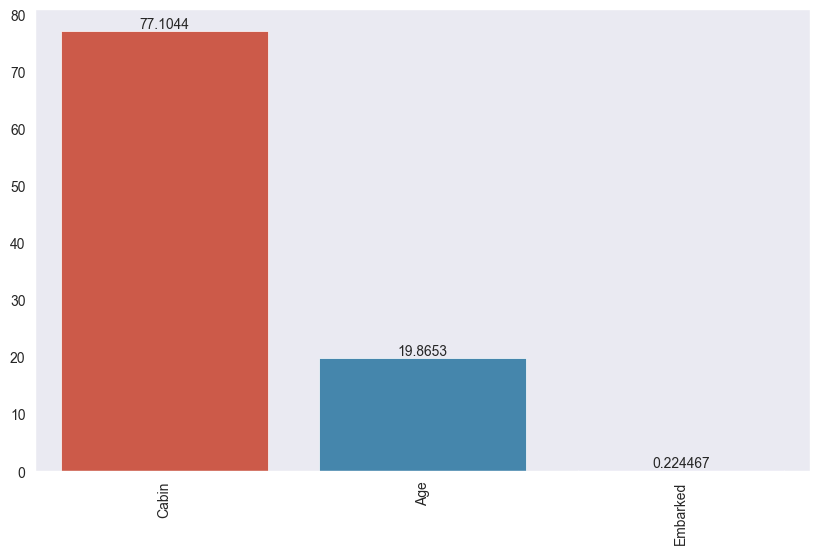

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


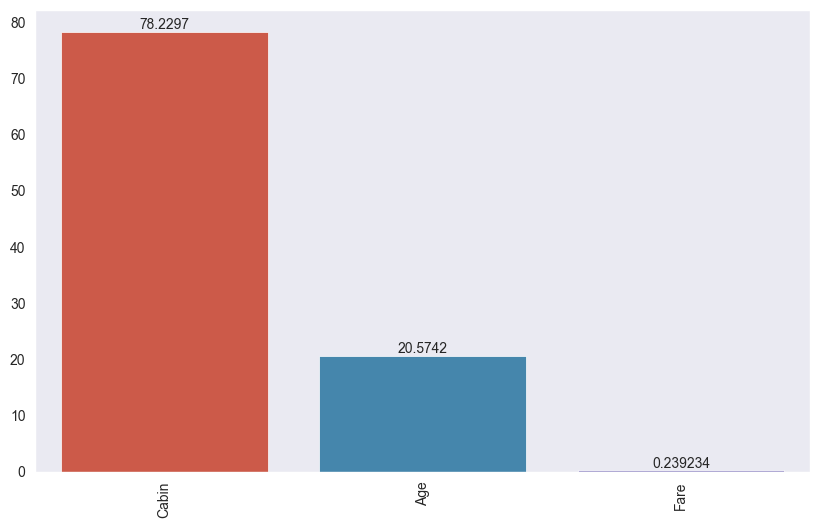

In [5]:
for data in dataset:
    data_isna=data.isna().sum().sort_values(ascending=False)
    data_isna_perc=(data_isna[data_isna>0]*100)/len(data)
    print(data_isna)
    plt.xticks(rotation="vertical")
    ax=sns.barplot(x=data_isna_perc.index, y=data_isna_perc)
    ax.bar_label(ax.containers[0])
    plt.show()

In [6]:
for data in dataset:
    data["Age"].fillna(data["Age"].median(), inplace=True)
    data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
    data["Fare"].fillna(data["Age"].median(), inplace=True)

    data.drop("Cabin", axis=1, inplace = True)
    numfeat = data.select_dtypes(include=[np.number]).columns.to_list()
    objfeat = data.select_dtypes(include=["object"]).columns.to_list()

3.3. Correct outliers

In [7]:
def detect_outliers(df,n,features):

    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers


In [8]:
for data in dataset:
    outliers = detect_outliers(data,2,["Age", "Parch", "Fare"])
    print(data.loc[outliers, numfeat])

     PassengerId  Pclass    Age  SibSp  Parch    Fare
268          269       1 58.000      0      1 153.463
297          298       1  2.000      1      2 151.550
305          306       1  0.920      1      2 151.550
438          439       1 64.000      1      4 263.000
587          588       1 60.000      1      1  79.200
659          660       1 58.000      0      2 113.275
745          746       1 70.000      1      1  71.000
879          880       1 56.000      0      1  83.158
     PassengerId  Pclass    Age  SibSp  Parch    Fare
69           961       1 60.000      1      4 263.000
142         1034       1 61.000      1      3 262.375
179         1071       1 64.000      0      2  83.158
217         1109       1 57.000      1      1 164.867
308         1200       1 55.000      1      1  93.500
343         1235       1 58.000      0      1 512.329


In [9]:
for data in dataset:
    print(data[numfeat].describe())

       PassengerId  Pclass     Age   SibSp   Parch    Fare
count      891.000 891.000 891.000 891.000 891.000 891.000
mean       446.000   2.309  29.362   0.523   0.382  32.204
std        257.354   0.836  13.020   1.103   0.806  49.693
min          1.000   1.000   0.420   0.000   0.000   0.000
25%        223.500   2.000  22.000   0.000   0.000   7.910
50%        446.000   3.000  28.000   0.000   0.000  14.454
75%        668.500   3.000  35.000   1.000   0.000  31.000
max        891.000   3.000  80.000   8.000   6.000 512.329
       PassengerId  Pclass     Age   SibSp   Parch    Fare
count      418.000 418.000 418.000 418.000 418.000 418.000
mean      1100.500   2.266  29.599   0.447   0.392  35.607
std        120.810   0.842  12.704   0.897   0.981  55.842
min        892.000   1.000   0.170   0.000   0.000   0.000
25%        996.250   1.000  23.000   0.000   0.000   7.896
50%       1100.500   3.000  27.000   0.000   0.000  14.454
75%       1204.750   3.000  35.750   1.000   0.000  31.4

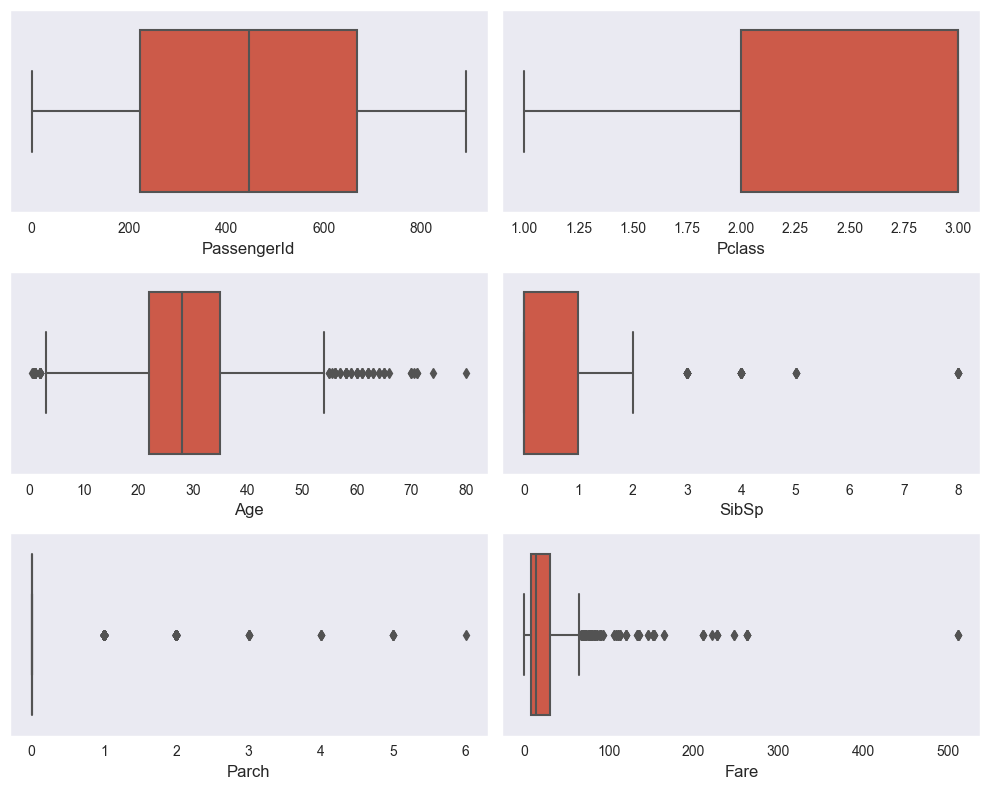

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(10, 8))
for i, col in enumerate(numfeat):
    x = i // 2
    y = i % 2
    hp=sns.boxplot(data=train, x=col, ax=ax[x, y]) 
    hp.set(ylabel=None)
plt.tight_layout()
plt.show()

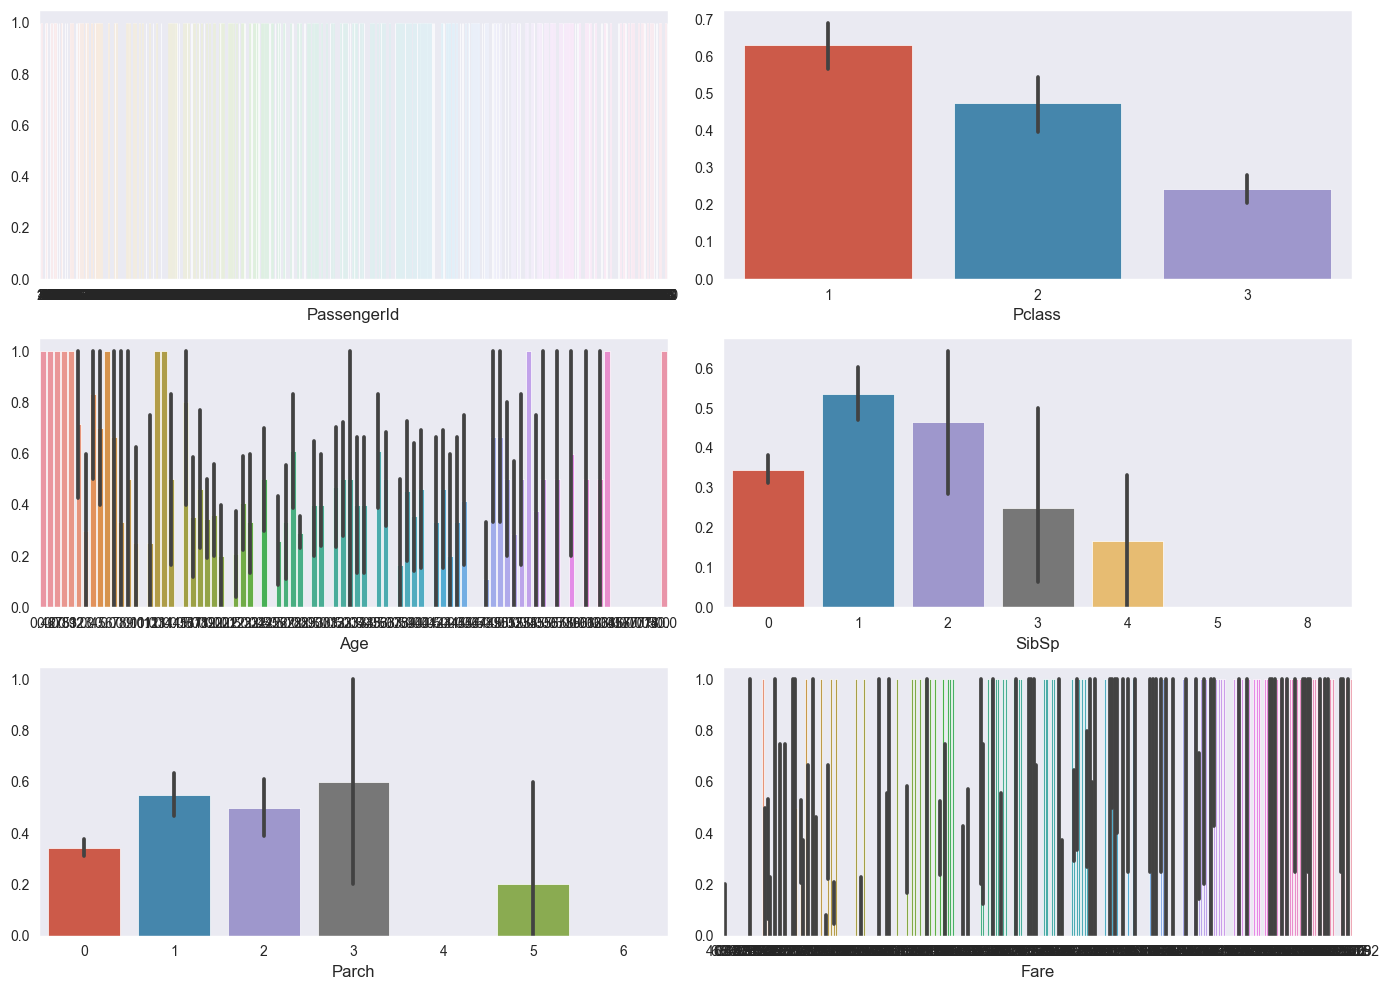

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(14, 10))
for i, col in enumerate(numfeat):
    x = i // 2
    y = i % 2
    sc=sns.barplot(data=train, x=col, y='Survived', ax=ax[x, y])
    sc.set(ylabel=None)  
plt.tight_layout()
plt.show()

3.4. Cleaning data string

In [12]:
for data in dataset:
    for col in objfeat:
        print(data[col].value_counts())

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helen

In [13]:
for data in dataset:
    print(data.Name.duplicated(keep=False).sum())

0
0


3.5. Remove duplicates

In [14]:
print(train.duplicated(keep=False).sum())
print(train.T.duplicated(keep=False).sum())
# rows duplicated
print(train[train.duplicated(keep=False)])
print(train.T[train.T.duplicated(keep=False)].T)

0
0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[891 rows x 0 columns]


4. FEATURE ENGINEERING

4.1. Feature selection

In [15]:
for data in dataset:
    drop_column = ['PassengerId', 'Ticket']
    data.drop(drop_column, axis=1, inplace=True)
    numfeat = data.select_dtypes(include=[np.number]).columns.to_list()

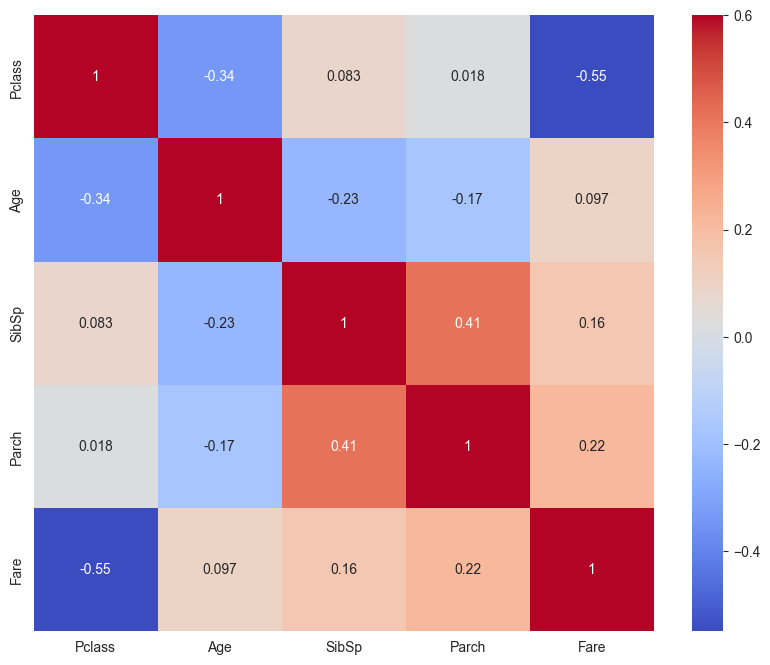

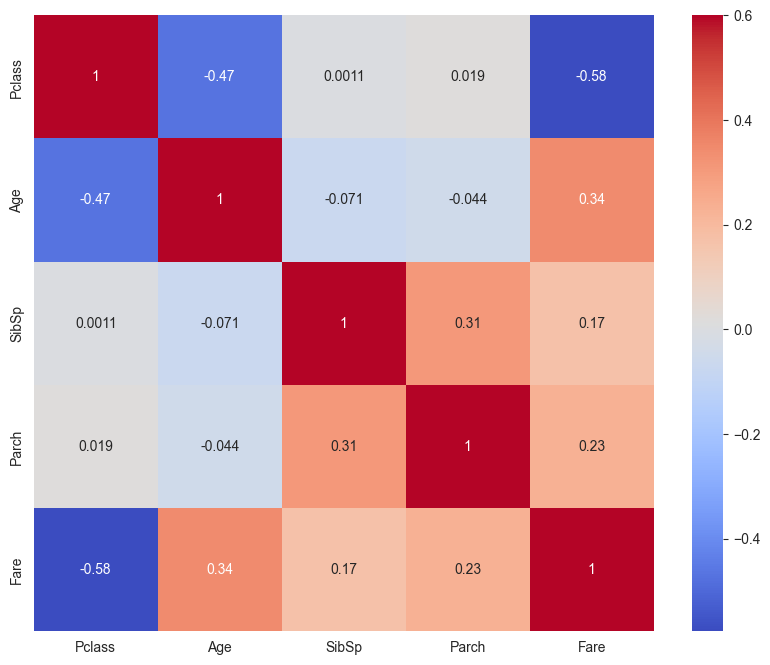

In [16]:
for data in dataset:
    corrmat = data[numfeat].corr()
    plt.subplots(figsize=(10,8))
    sns.heatmap(corrmat, vmax=.6, cmap="coolwarm", annot=True)

4.2. Feature creation

In [17]:
print(train.Name.head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


In [18]:
for data in dataset:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    print(pd.crosstab(data['Title'], data['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


In [19]:
print(train.loc[train.Title[train.Title == "Dr"].index.to_list(), ["Name","Sex"]])

                              Name     Sex
245    Minahan, Dr. William Edward    male
317           Moraweck, Dr. Ernest    male
398               Pain, Dr. Alfred    male
632      Stahelin-Maeglin, Dr. Max    male
660  Frauenthal, Dr. Henry William    male
766      Brewe, Dr. Arthur Jackson    male
796    Leader, Dr. Alice (Farnham)  female


In [20]:
for data in dataset:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575
1,Miss,0.703
2,Mr,0.157
3,Mrs,0.794
4,Rare,0.348


In [21]:
for data in dataset:
    data["Family"] = data.SibSp + data.Parch + 1

train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724
2,3,0.578
1,2,0.553
6,7,0.333
0,1,0.304
4,5,0.200
5,6,0.136
7,8,0.000
8,11,0.000


In [22]:
for data in dataset:
    data['Single'] = data['Family'].map(lambda s: 1 if s == 1 else 0)
    data['SmallF'] = data['Family'].map(lambda s: 1 if  s == 2  else 0)
    data['MedF'] = data['Family'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    data['LargeF'] = data['Family'].map(lambda s: 1 if s >= 5 else 0)

In [23]:
for data in dataset:
    data["AClass"] = data["Age"] * data["Pclass"]

train.loc[:, ['AClass', 'Age', 'Pclass']].head(10)

,AClass,Age,Pclass
0,66.000,22.000,3
1,38.000,38.000,1
2,78.000,26.000,3
3,35.000,35.000,1
4,105.000,35.000,3
5,84.000,28.000,3
6,54.000,54.000,1
7,6.000,2.000,3
8,81.000,27.000,3
9,28.000,14.000,2


In [24]:
for data in dataset:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Title     891 non-null    object 
 10  Family    891 non-null    int64  
 11  Single    891 non-null    int64  
 12  SmallF    891 non-null    int64  
 13  MedF      891 non-null    int64  
 14  LargeF    891 non-null    int64  
 15  AClass    891 non-null    float64
dtypes: float64(3), int64(9), object(4)
memory usage: 111.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column    Non-

<Axes: >

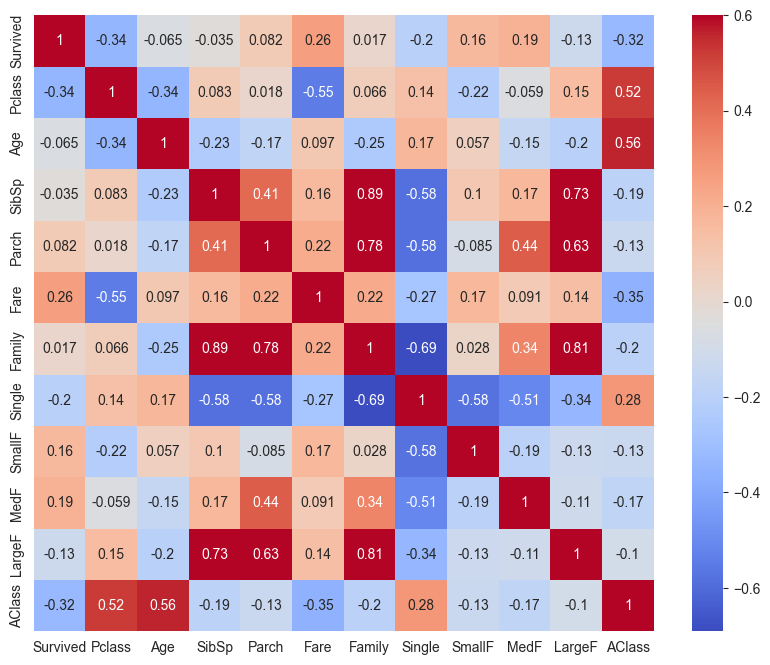

In [25]:
numfeat = train.select_dtypes(include=[np.number]).columns.to_list()
corrmat = train[numfeat].corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.6, cmap="coolwarm", annot=True)

In [26]:
for data in dataset:
    drop_column = ['Family', "Name"]
    data.drop(drop_column, axis=1, inplace=True)
    numfeat = data.select_dtypes(include=[np.number]).columns.to_list()

In [27]:
for data in dataset:
    data['AgeBin'] = pd.cut(data['Age'], 5)

In [28]:
for data in dataset:
    data['FareBin'] = pd.qcut(data['Fare'], 4)
    data['AClassBin'] = pd.qcut(data['AClass'], 5)

In [29]:
for data in dataset:
    print(data.head())

   Survived  Pclass     Sex    Age  SibSp  Parch   Fare Embarked Title  \
0         0       3    male 22.000      1      0  7.250        S    Mr   
1         1       1  female 38.000      1      0 71.283        C   Mrs   
2         1       3  female 26.000      0      0  7.925        S  Miss   
3         1       1  female 35.000      1      0 53.100        S   Mrs   
4         0       3    male 35.000      0      0  8.050        S    Mr   

   Single  SmallF  MedF  LargeF  AClass            AgeBin          FareBin  \
0       0       1     0       0  66.000  (16.336, 32.252]   (-0.001, 7.91]   
1       0       1     0       0  38.000  (32.252, 48.168]  (31.0, 512.329]   
2       1       0     0       0  78.000  (16.336, 32.252]   (7.91, 14.454]   
3       0       1     0       0  35.000  (32.252, 48.168]  (31.0, 512.329]   
4       1       0     0       0 105.000  (32.252, 48.168]   (7.91, 14.454]   

       AClassBin  
0   (55.0, 72.0]  
1   (35.0, 55.0]  
2   (72.0, 84.0]  
3  (0.919,

5. EDA

5.1. Distributions

In [30]:
edafeat = ["Age", "Fare", "AClass"]

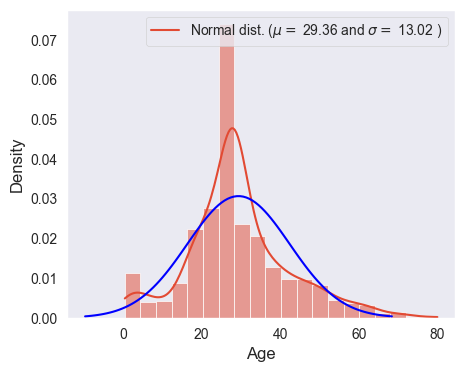

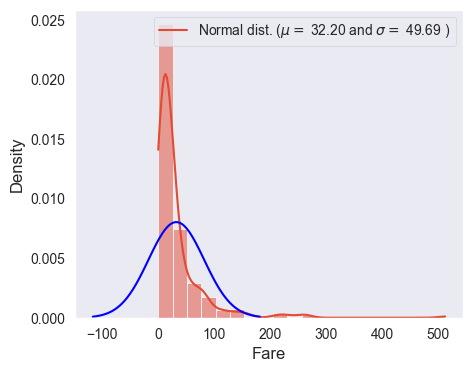

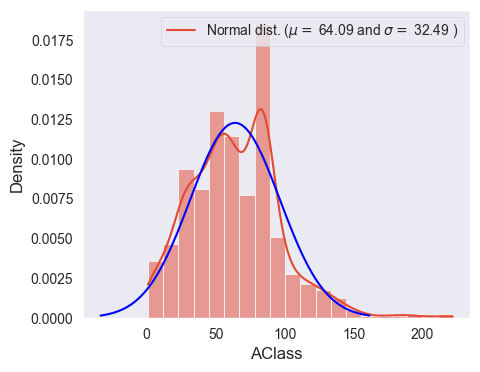

In [31]:
from scipy import stats
from scipy.stats import norm, skew, kurtosis

for col in edafeat:
    mu, sigma = train[col].mean(), train[col].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = norm.pdf(x, mu, sigma)

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.histplot(train[col], kde=True, stat='density', ax=ax, bins=20)
    ax.plot(x, y, 'b', label='Distribución normal')
    ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

    plt.show()

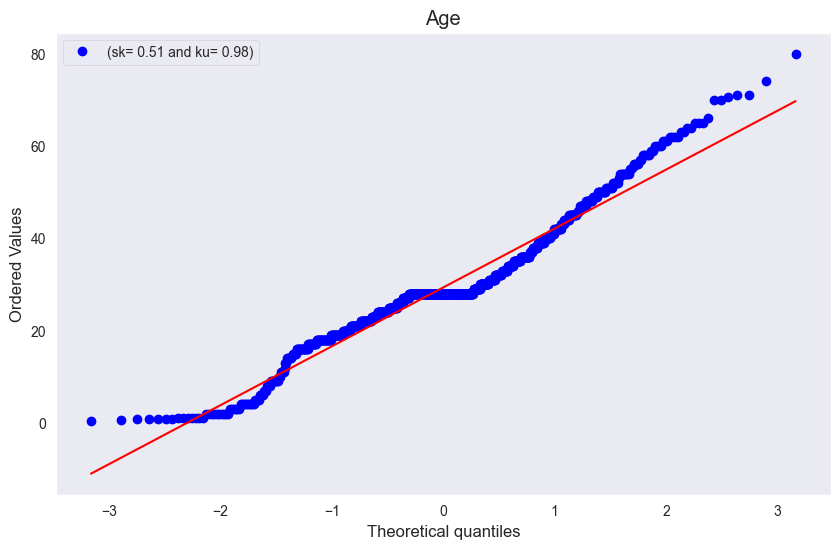

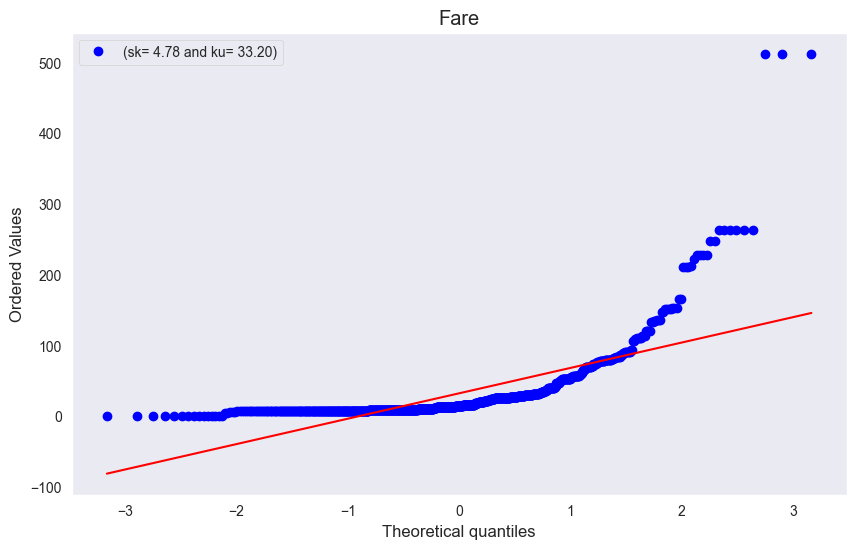

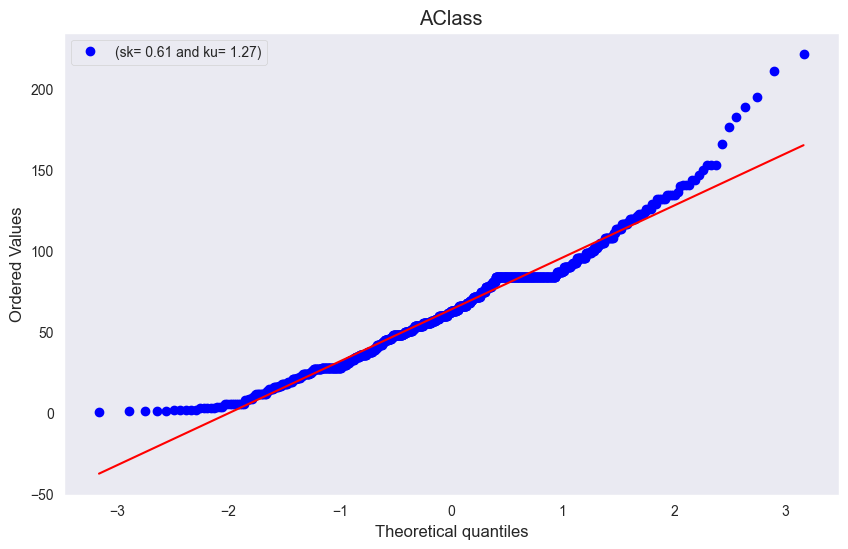

In [32]:
for col in edafeat:
    stats.probplot(train[col], plot=plt)
    plt.title(col)
    skeww = stats.skew(train[col])
    kurt = kurtosis(train[col])
    plt.legend(['(sk= {:.2f} and ku= {:.2f})'.format(skeww, kurt)],
            loc='best')
    plt.show()

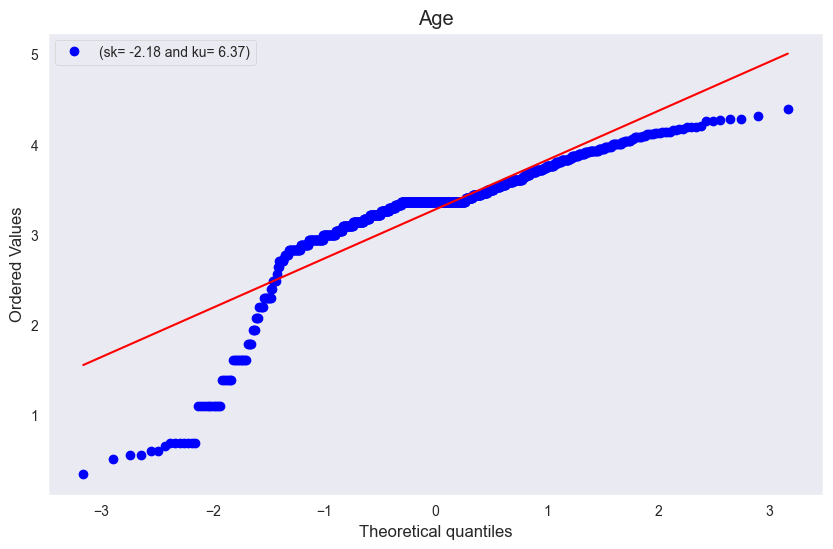

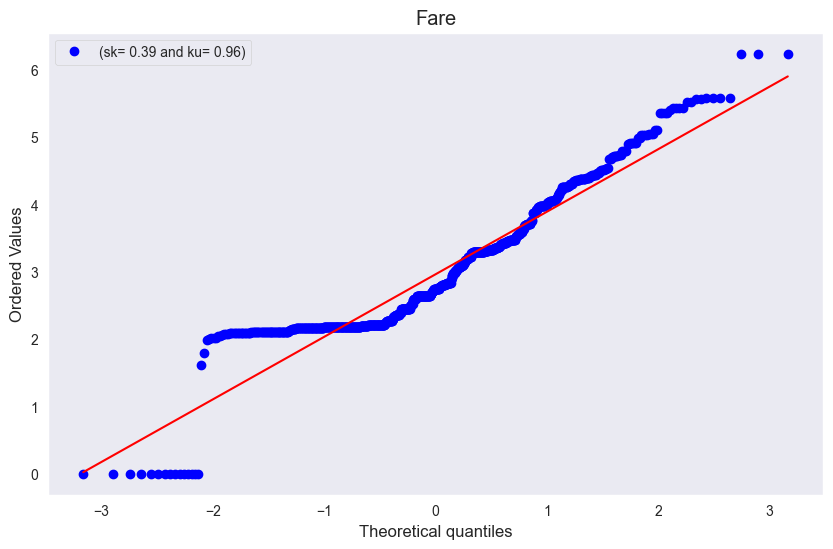

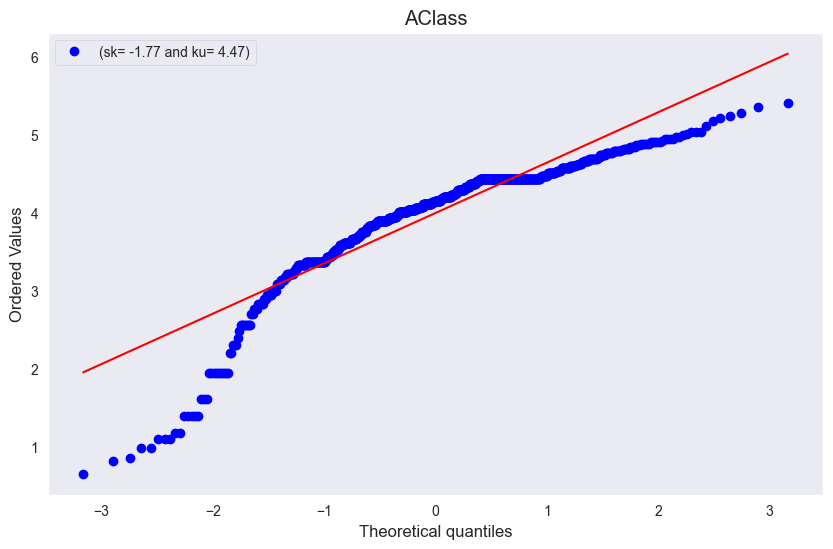

In [33]:
for col in edafeat:
    stats.probplot(np.log1p(train[col]), plot=plt)
    plt.title(col)
    skeww = stats.skew(np.log1p(train[col]))
    kurt = kurtosis(np.log1p(train[col]))
    plt.legend(['(sk= {:.2f} and ku= {:.2f})'.format(skeww, kurt)],
            loc='best')
    plt.show()

In [34]:
for data in dataset:
    data["Fare"] = np.log1p(data["Fare"])

In [35]:
for data in dataset:
    print(data.head())

   Survived  Pclass     Sex    Age  SibSp  Parch  Fare Embarked Title  Single  \
0         0       3    male 22.000      1      0 2.110        S    Mr       0   
1         1       1  female 38.000      1      0 4.281        C   Mrs       0   
2         1       3  female 26.000      0      0 2.189        S  Miss       1   
3         1       1  female 35.000      1      0 3.991        S   Mrs       0   
4         0       3    male 35.000      0      0 2.203        S    Mr       1   

   SmallF  MedF  LargeF  AClass            AgeBin          FareBin  \
0       1     0       0  66.000  (16.336, 32.252]   (-0.001, 7.91]   
1       1     0       0  38.000  (32.252, 48.168]  (31.0, 512.329]   
2       0     0       0  78.000  (16.336, 32.252]   (7.91, 14.454]   
3       1     0       0  35.000  (32.252, 48.168]  (31.0, 512.329]   
4       0     0       0 105.000  (32.252, 48.168]   (7.91, 14.454]   

       AClassBin  
0   (55.0, 72.0]  
1   (35.0, 55.0]  
2   (72.0, 84.0]  
3  (0.919, 35.0]

5.2. Relationships

<Axes: >

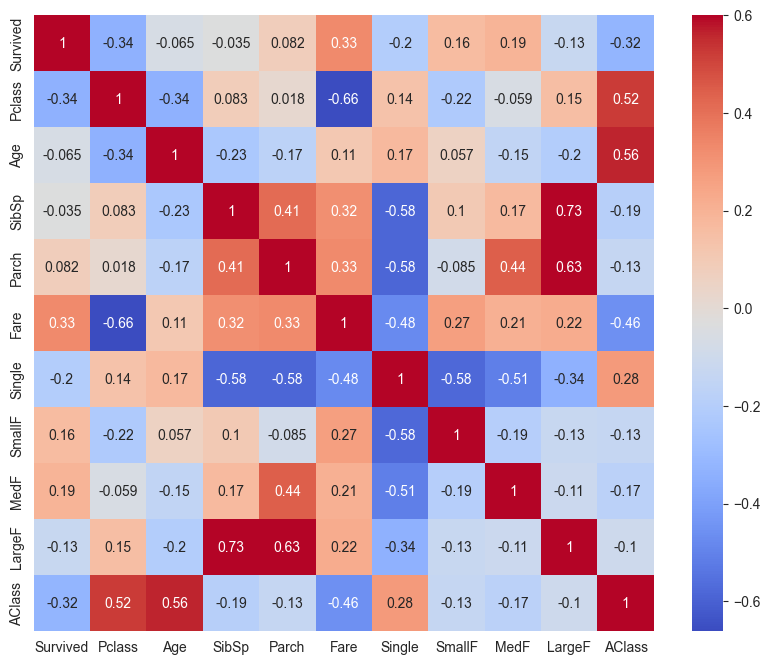

In [36]:
numfeat = train.select_dtypes(include=[np.number]).columns.to_list()
corrmat = train[numfeat].corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.6, cmap="coolwarm", annot=True)

4.3. Label enconding

In [37]:
from sklearn.preprocessing import LabelEncoder 
encoding_list = ["Sex", "Embarked", "Title", "AgeBin", "FareBin", "AClassBin"]
label = LabelEncoder()
for data in dataset:
    for col in encoding_list:
        data[col+"_code"] = label.fit_transform(data[col])
    print(data.head())


   Survived  Pclass     Sex    Age  SibSp  Parch  Fare Embarked Title  Single  \
0         0       3    male 22.000      1      0 2.110        S    Mr       0   
1         1       1  female 38.000      1      0 4.281        C   Mrs       0   
2         1       3  female 26.000      0      0 2.189        S  Miss       1   
3         1       1  female 35.000      1      0 3.991        S   Mrs       0   
4         0       3    male 35.000      0      0 2.203        S    Mr       1   

   ...  AClass            AgeBin          FareBin      AClassBin Sex_code  \
0  ...  66.000  (16.336, 32.252]   (-0.001, 7.91]   (55.0, 72.0]        1   
1  ...  38.000  (32.252, 48.168]  (31.0, 512.329]   (35.0, 55.0]        0   
2  ...  78.000  (16.336, 32.252]   (7.91, 14.454]   (72.0, 84.0]        0   
3  ...  35.000  (32.252, 48.168]  (31.0, 512.329]  (0.919, 35.0]        0   
4  ... 105.000  (32.252, 48.168]   (7.91, 14.454]  (84.0, 222.0]        1   

  Embarked_code Title_code  AgeBin_code  FareBin_c

In [38]:
for data in dataset:
    drop_column = ['Sex', "Embarked", "Title", "AgeBin", "FareBin", "AClassBin"]
    data.drop(drop_column, axis=1, inplace=True)
    numfeat = data.select_dtypes(include=[np.number]).columns.to_list()
    print(data.head())

   Survived  Pclass    Age  SibSp  Parch  Fare  Single  SmallF  MedF  LargeF  \
0         0       3 22.000      1      0 2.110       0       1     0       0   
1         1       1 38.000      1      0 4.281       0       1     0       0   
2         1       3 26.000      0      0 2.189       1       0     0       0   
3         1       1 35.000      1      0 3.991       0       1     0       0   
4         0       3 35.000      0      0 2.203       1       0     0       0   

   AClass  Sex_code  Embarked_code  Title_code  AgeBin_code  FareBin_code  \
0  66.000         1              2           2            1             0   
1  38.000         0              0           3            2             3   
2  78.000         0              2           1            1             1   
3  35.000         0              2           3            2             3   
4 105.000         1              2           2            2             1   

   AClassBin_code  
0               2  
1               

<Axes: >

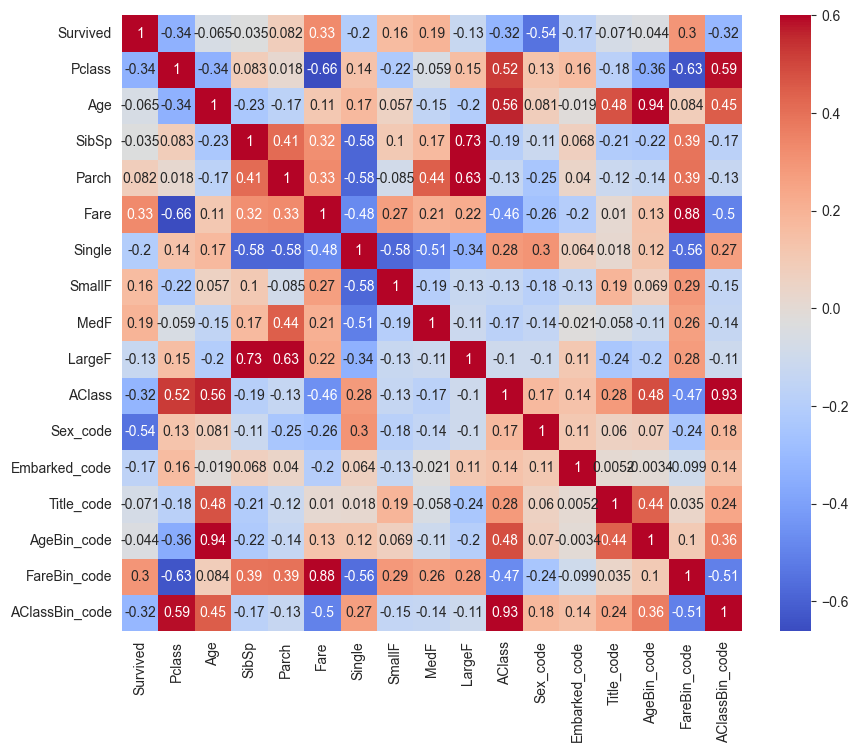

In [39]:
numfeat = train.select_dtypes(include=[np.number]).columns.to_list()
corrmat = train[numfeat].corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.6, cmap="coolwarm", annot=True)

In [40]:
for i, data in enumerate(dataset):
    if i == 0:
        train_b = data.drop(columns=["Age", "Fare", "AClass"])
    else:
        test_b = data.drop(columns=["Age", "Fare", "AClass"])

print(train_b.head(),"\n" , test_b.head())
dataset_b = [train_b, test_b]

   Survived  Pclass  SibSp  Parch  Single  SmallF  MedF  LargeF  Sex_code  \
0         0       3      1      0       0       1     0       0         1   
1         1       1      1      0       0       1     0       0         0   
2         1       3      0      0       1       0     0       0         0   
3         1       1      1      0       0       1     0       0         0   
4         0       3      0      0       1       0     0       0         1   

   Embarked_code  Title_code  AgeBin_code  FareBin_code  AClassBin_code  
0              2           2            1             0               2  
1              0           3            2             3               1  
2              2           1            1             1               3  
3              2           3            2             3               0  
4              2           2            2             1               4   
    Pclass  SibSp  Parch  Single  SmallF  MedF  LargeF  Sex_code  \
0       3      0      0 

In [41]:
for i, data in enumerate(dataset):
    if i == 0:
        train_n = data.drop(columns=["AgeBin_code", "FareBin_code", "AClassBin_code"])
    else:
        test_n = data.drop(columns=["AgeBin_code", "FareBin_code", "AClassBin_code"])

print(train_n.head(),"\n" , test_n.head())
dataset_n = [train_n, test_n]

   Survived  Pclass    Age  SibSp  Parch  Fare  Single  SmallF  MedF  LargeF  \
0         0       3 22.000      1      0 2.110       0       1     0       0   
1         1       1 38.000      1      0 4.281       0       1     0       0   
2         1       3 26.000      0      0 2.189       1       0     0       0   
3         1       1 35.000      1      0 3.991       0       1     0       0   
4         0       3 35.000      0      0 2.203       1       0     0       0   

   AClass  Sex_code  Embarked_code  Title_code  
0  66.000         1              2           2  
1  38.000         0              0           3  
2  78.000         0              2           1  
3  35.000         0              2           3  
4 105.000         1              2           2   
    Pclass    Age  SibSp  Parch  Fare  Single  SmallF  MedF  LargeF  AClass  \
0       3 34.500      0      0 2.178       1       0     0       0 103.500   
1       3 47.000      1      0 2.079       0       1     0       0 

4.4. Dummy features

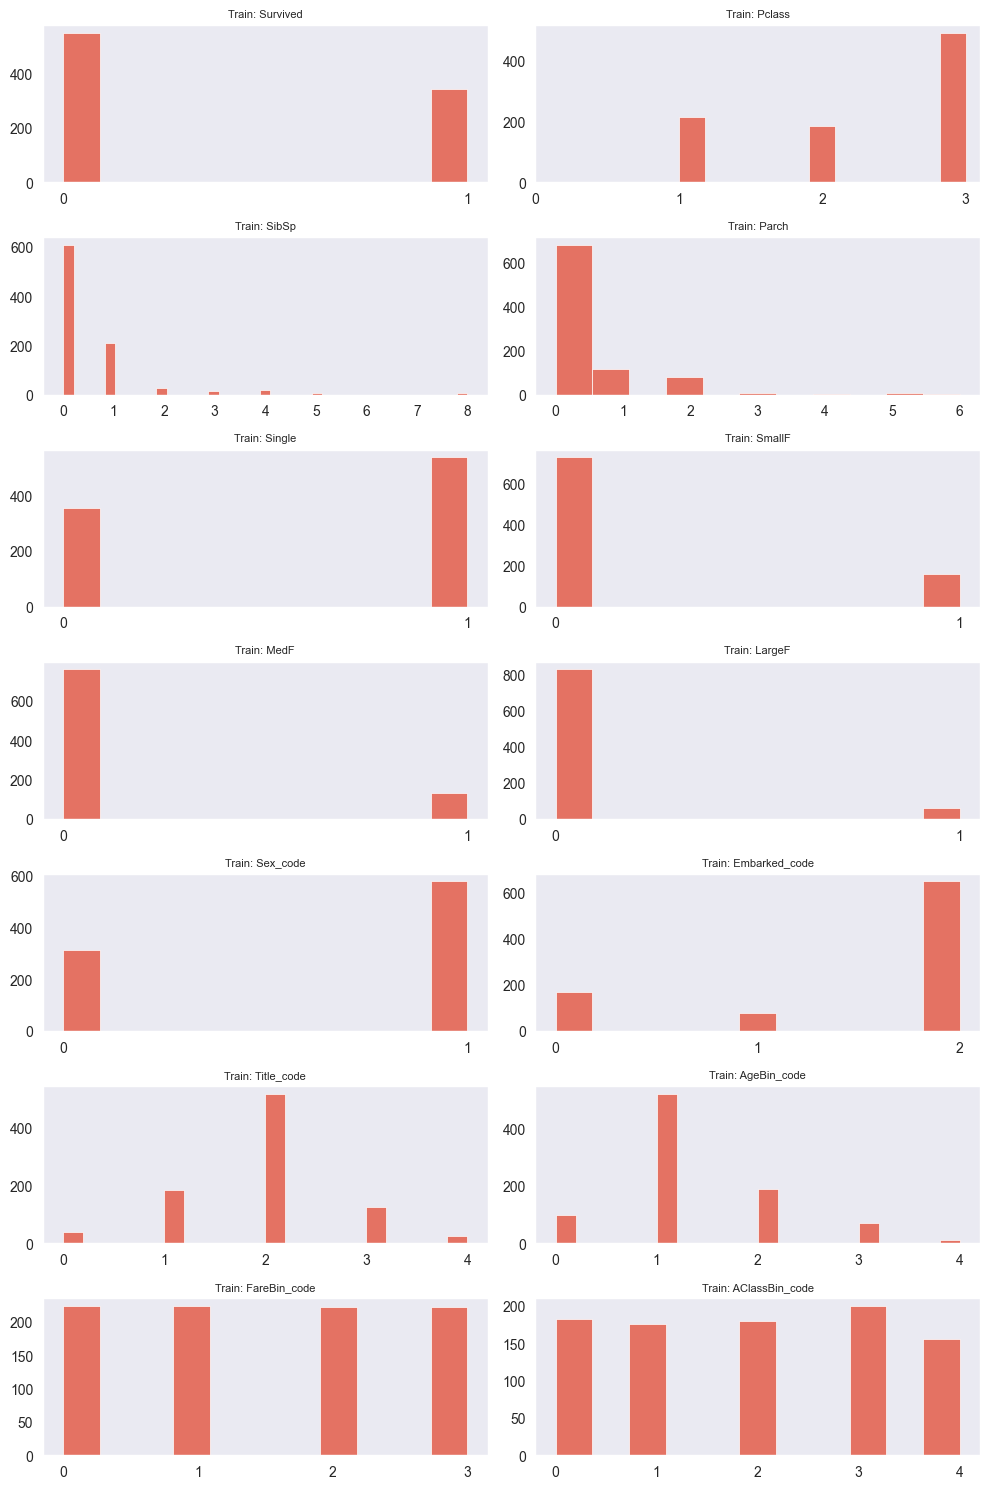

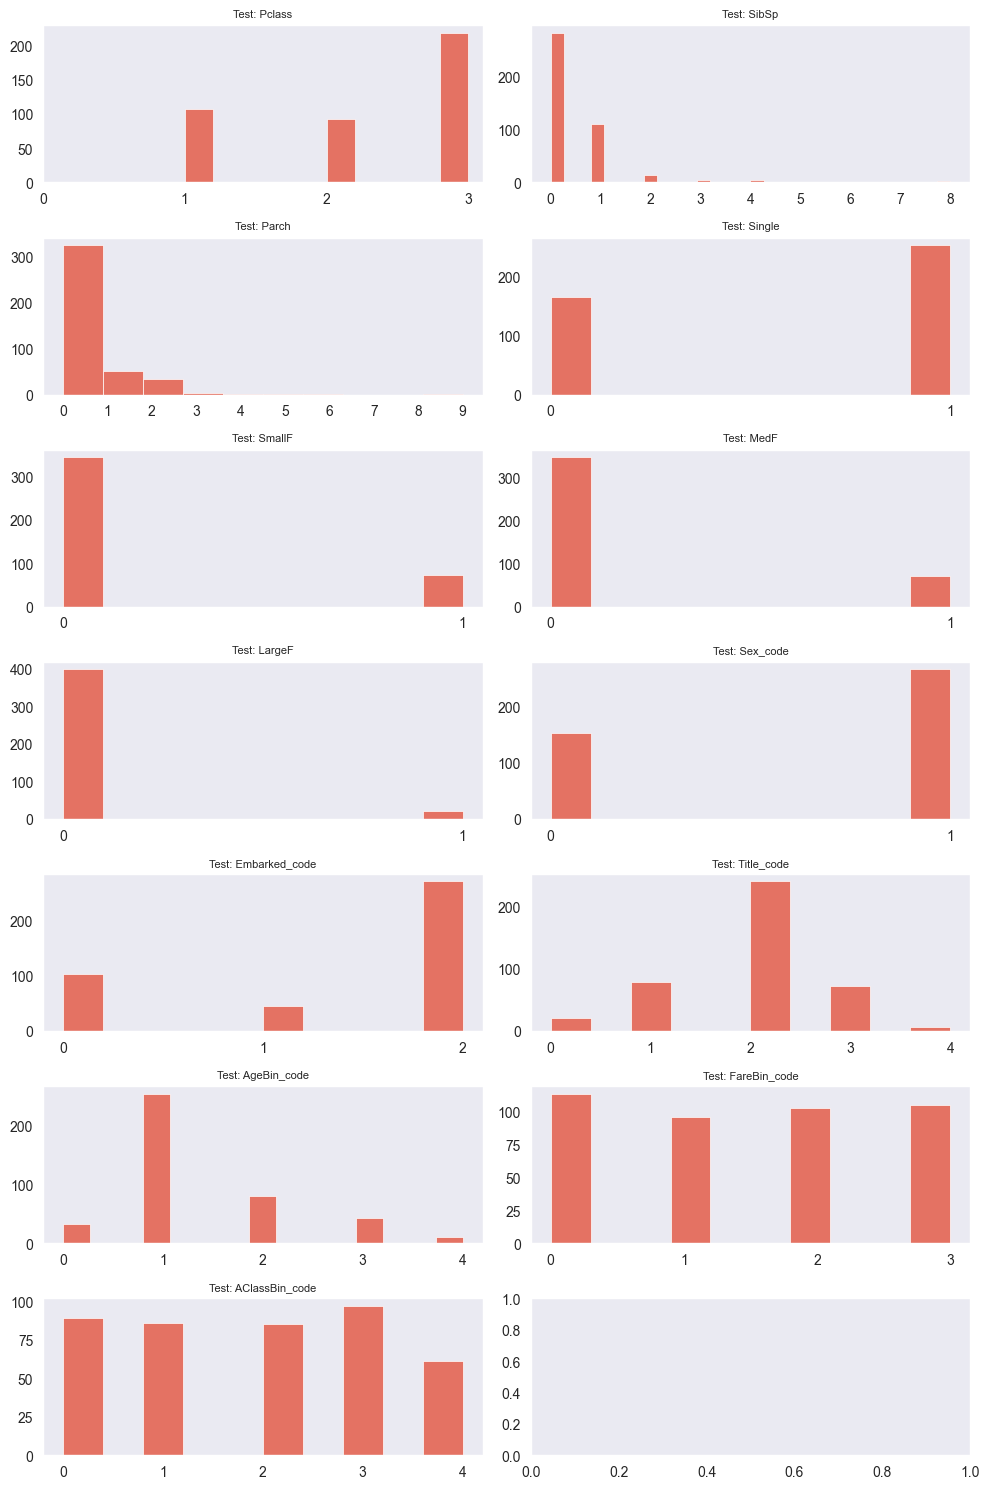

In [42]:
for i,data in enumerate(dataset_b):
    fig, ax = plt.subplots(7, 2, figsize=(10, 15))
    for j,col in enumerate(data.columns):
        x = j // 2
        y = j % 2
        s=sns.histplot(data[col], ax=ax[x, y])
        s.set(ylabel=None, xlabel=None) 
        s.set_title("Train: "+col, fontsize=8) if i==0 else s.set_title("Test: "+col, fontsize=8)
        s.set_xticks(np.arange(data[col].value_counts().index.max()+1))
    plt.tight_layout()
    plt.show()

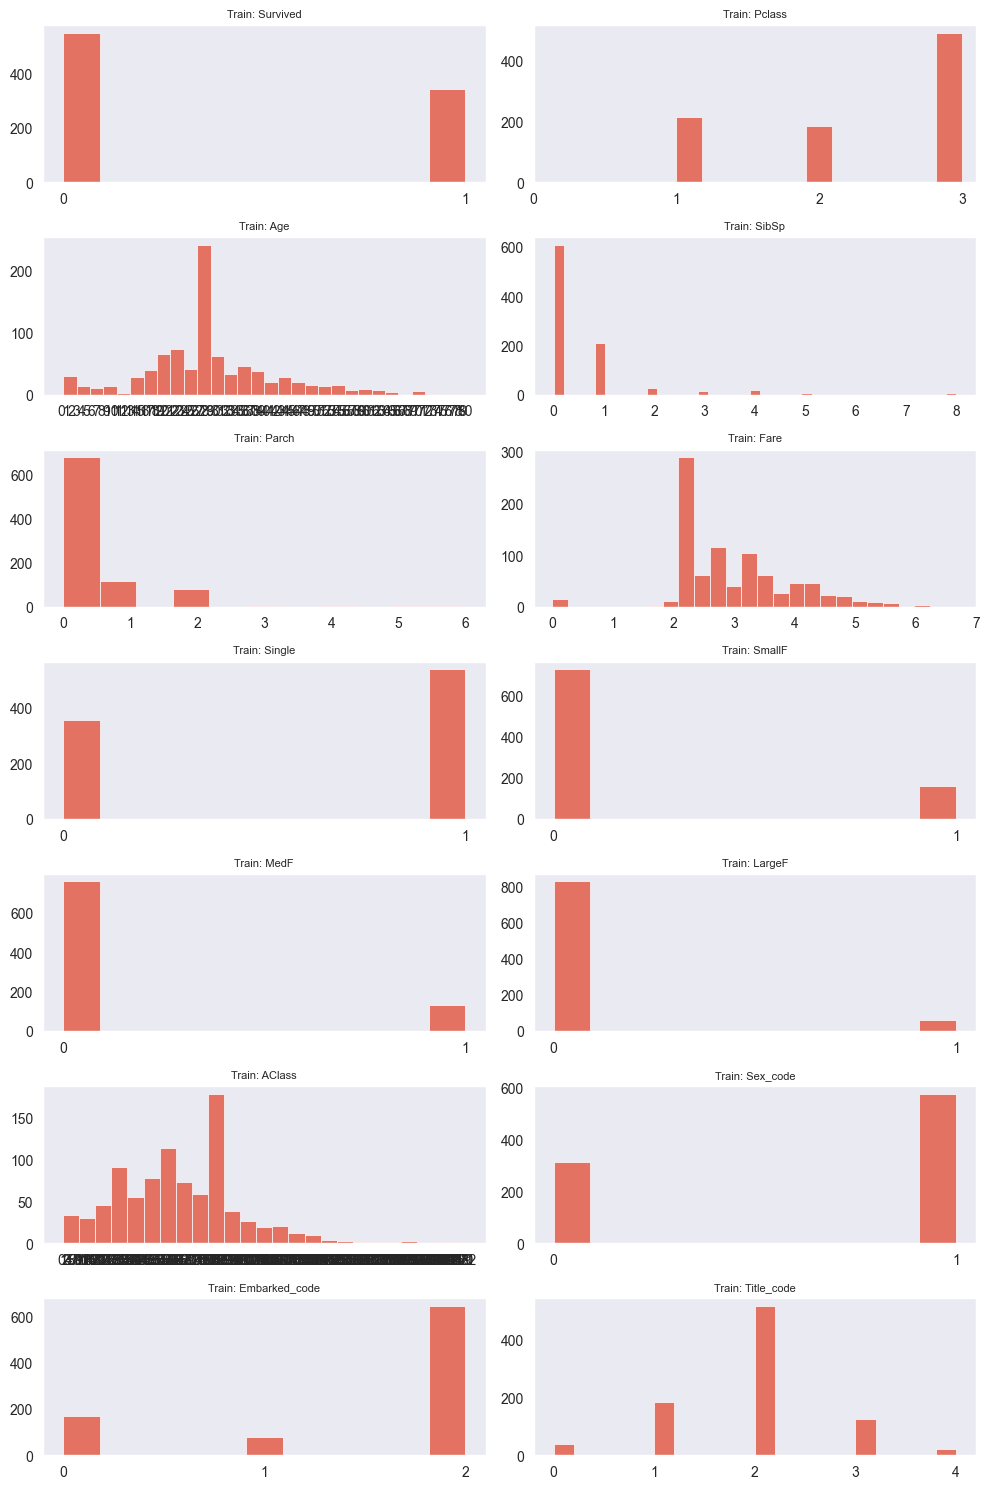

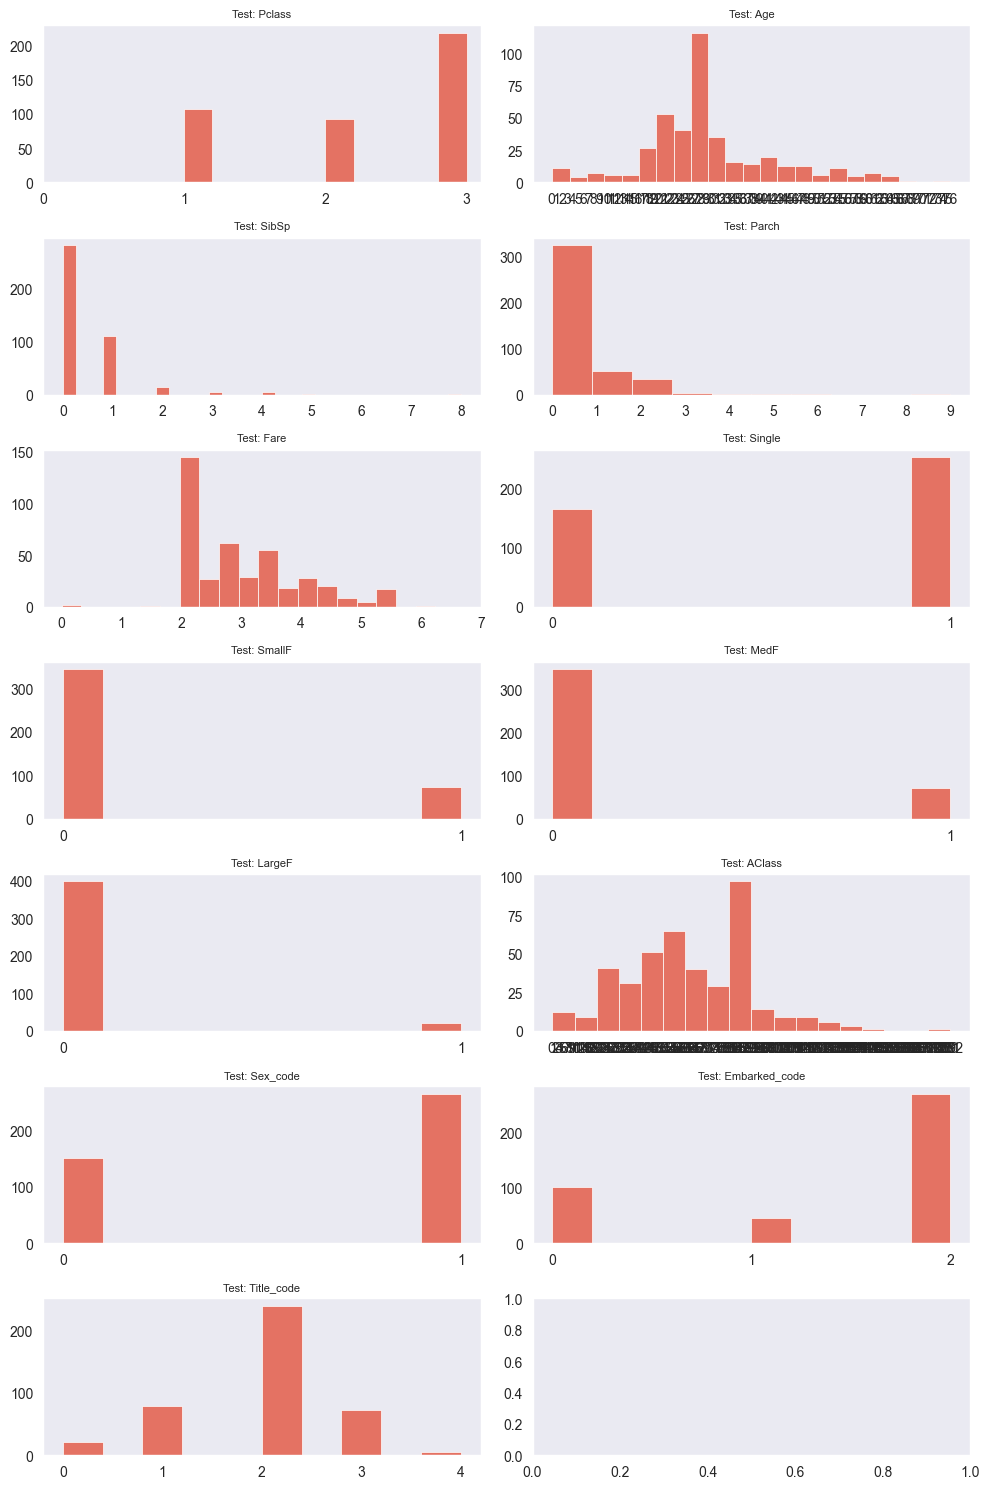

In [43]:
for i,data in enumerate(dataset_n):
    fig, ax = plt.subplots(7, 2, figsize=(10, 15))
    for j,col in enumerate(data.columns):
        x = j // 2
        y = j % 2
        s=sns.histplot(data[col], ax=ax[x, y])
        s.set(ylabel=None, xlabel=None) 
        s.set_title("Train: "+col, fontsize=8) if i==0 else s.set_title("Test: "+col, fontsize=8)
        s.set_xticks(np.arange(data[col].value_counts().index.max()+1))
    plt.tight_layout()
    plt.show()

In [44]:
data = pd.concat([train_b, test_b], ignore_index=True)
not_cols = ['Survived', 'Pclass']
data = pd.get_dummies(data, columns=[col for col in data.columns if col not in not_cols]).reset_index(drop=True)
train_d = data.iloc[:len(train_b),:]
test_d = data.iloc[len(train_b):,:].drop(columns="Survived")

dataset_d = [train_d, test_d]

In [45]:
dataset_b[0].to_csv("../data/train_b.csv")
dataset_b[1].to_csv("../data/test_b.csv")

dataset_n[0].to_csv("../data/train_n.csv")
dataset_n[1].to_csv("../data/test_n.csv")

dataset_d[0].to_csv("../data/train_d.csv")
dataset_d[1].to_csv("../data/test_d.csv")

In [46]:
print(train_d.shape)
print(test_d.shape)

(891, 49)
(418, 48)
